In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/sms-spam-collection-dataset


mkdir: cannot create directory ‘/root/.kaggle’: File exists
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
! unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [24]:
df = pd.read_csv("/content/spam.csv", encoding = "cp1252")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1513,ham,Hows the champ just leaving glasgow!,NaN,NaN,NaN
3869,ham,Oh ok wait 4 me there... My lect havent finish,NaN,NaN,NaN
1421,ham,Do you work all this week ?,NaN,NaN,NaN
5174,ham,Water logging in desert. Geoenvironmental impl...,NaN,NaN,NaN
5443,spam,You have won a guaranteed 32000 award or maybe...,NaN,NaN,NaN


In [25]:
df.shape

(5572, 5)

Data Cleaning

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [27]:
#removing the extra columns
df.drop(columns=["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], inplace = True)
#renaming the v1 and v2 column name
df.rename(columns = {"v1":"Traget", "v2": "Message"}, inplace = True)
df.sample(5)

,Traget,Message
5541,ham,Yeah it's jus rite...
1754,ham,How is your schedule next week? I am out of to...
2873,ham,Crucify is c not s. You should have told me ea...
3813,ham,Can. Dunno wat to get 4 her...
34,spam,Thanks for your subscription to Ringtone UK yo...


In [28]:
#using lable encoder tochange hamm to "1" and spam to "0"
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Traget"] = encoder.fit_transform(df["Traget"])

In [29]:
#checking missing values
df.isnull().sum()

Traget     0
Message    0
dtype: int64

In [30]:
#checking for duplicates
df.duplicated().sum()

403

In [31]:
df.drop_duplicates(keep = "first")

,Traget,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA : exploratory data analysis

In [32]:
#to get the numerical value of the frequency of hamm and spam
df["Traget"].value_counts()
#fom this analysis we understan that the data is unbalanced. there are more "hamm" than "spam"

0    4825
1     747
Name: Traget, dtype: int64

In [33]:
#how many words, character, senteces and len of the sms are there in the data lets analysis this?
import nltk
nltk.download("punkt")# nltk dependences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
#finding the lenght of the sms
df["len_of_sms"] = df["Message"].apply(len)

In [35]:
#to find the number of words in one sms
df["no_of_word"] = df["Message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
#to find the number of sentences.
df["no_of_sent"] = df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head(5)

,Traget,Message,len_of_sms,no_of_word,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#lets now plot the graph for hamm spam.

In [38]:
import seaborn as sns

<Axes: xlabel='len_of_sms', ylabel='Count'>

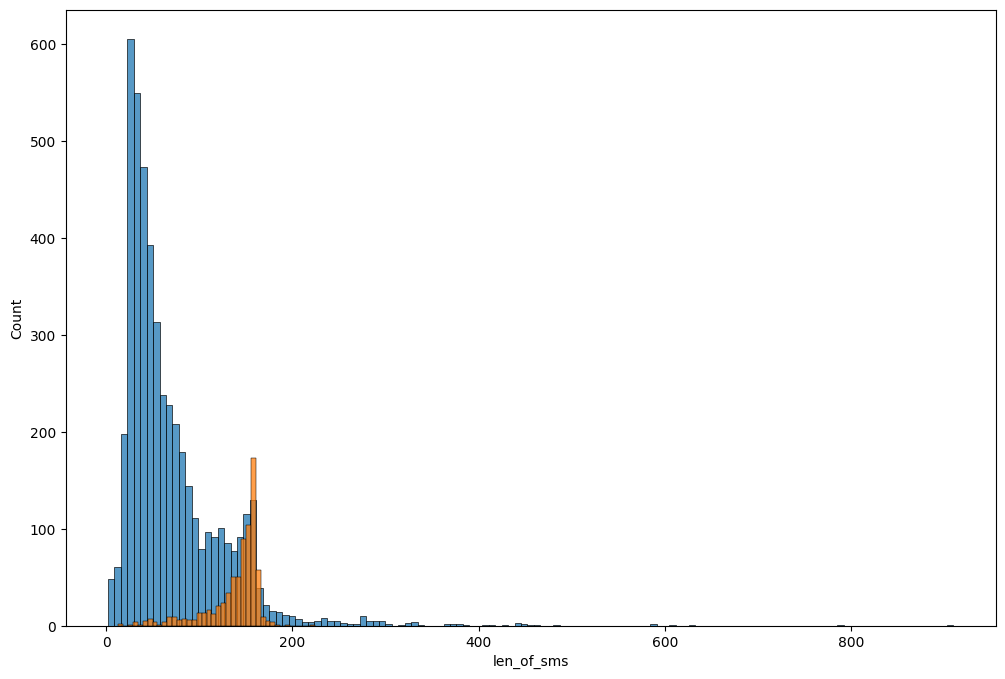

In [39]:
plt.figure(figsize= (12,8))
sns.histplot(df[df["Traget"]==0]["len_of_sms"])#for hamm
sns.histplot(df[df["Traget"]==1]["len_of_sms"])#for sns

<Axes: xlabel='no_of_word', ylabel='Count'>

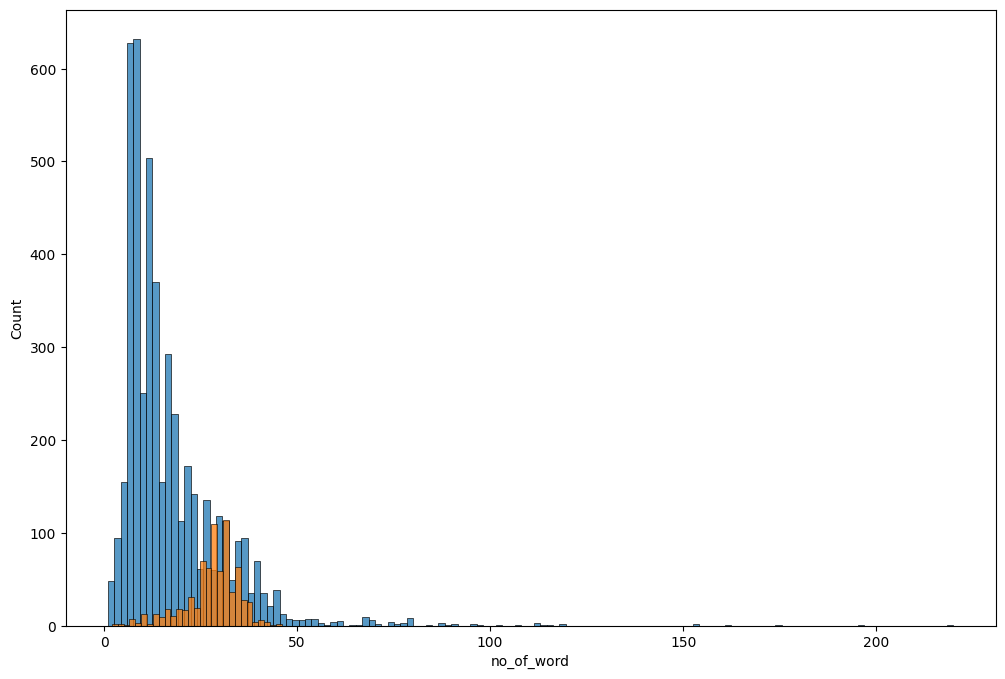

In [40]:
plt.figure(figsize= (12,8))
sns.histplot(df[df["Traget"]==0]["no_of_word"])#for hamm
sns.histplot(df[df["Traget"]==1]["no_of_word"])#for sns

<ipython-input-41-aa56466cc9e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)#annot = annotation whihc give the percentage to the block of heatmap


<Axes: >

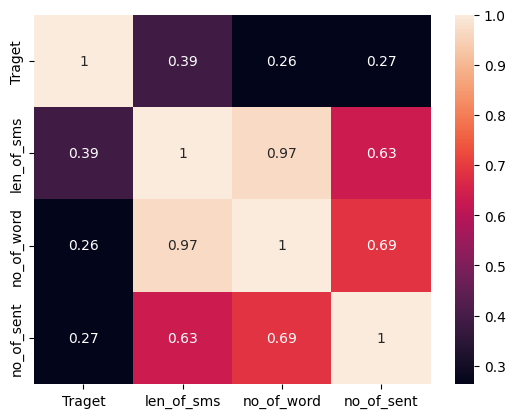

In [41]:

#lets see the corelation and the headt map
sns.heatmap(df.corr(), annot = True)#annot = annotation whihc give the percentage to the block of heatmap

#text preprocessing


*   lower case
*   tokenization
*   removing special characters
*   removing the stop words and punctuation
*   Stemming :- it changes the word in single words . words like: love , loving, loved






In [42]:
from nltk.corpus import stopwords#libaray for removing stop words
nltk.download('stopwords')
stopwords.words("english")

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
# complete function for text precessing
def low(text):
  text = text.lower()# to bring the string in lower case
  text = nltk.word_tokenize(text)# to bring the string in to list of words
  y = []#storing only alphabets and number
  for i in text:
    if i.isalnum():#removing speacial character
      y.append(i)

  # text = y  # you cant clone the list in this manner as list in a mutable data type
  text = y[:]# clone it in this way
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  #stemming
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [44]:
#TRANSFORMING MESSAGE COLUMN
df["Message"] = df["Message"].apply(low)
df

,Traget,Message,len_of_sms,no_of_word,no_of_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161,35,4
5568,0,b go esplanad fr home,37,9,1
5569,0,piti mood suggest,57,15,2
5570,0,guy bitch act like interest buy someth els nex...,125,27,1


# we will create work cloud of spam and hamm separately

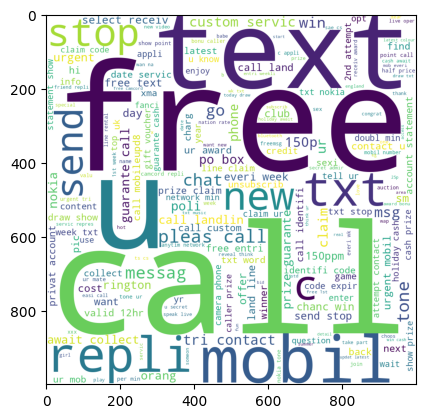

In [45]:
# using this you can know what are the word whihc are used the most time in these spam of messages
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color="white")
spam_wc = wc.generate(df[df["Traget"]==1]["Message"].str.cat(sep=" "))#putting only spam messages in the word map
plt.imshow(spam_wc)

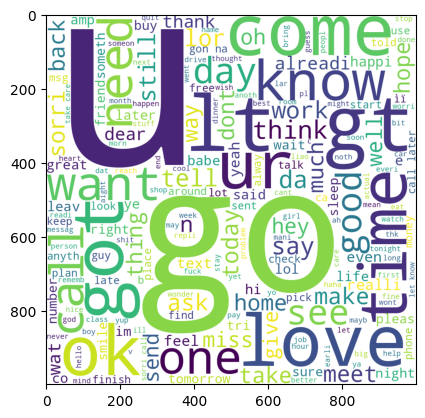

In [46]:
# using this you can know what are the word whihc are used the most time in these HAMM of messages
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color="white")
hamm_wc = wc.generate(df[df["Traget"]==0]["Message"].str.cat(sep=" "))#putting only spam messages in the word map
plt.imshow(hamm_wc)

now lets find you the top 30 words which occure frequesntly in hamm messages and pam messages


In [47]:
#first make the list of complete Message colum of spamm
all_wordds = []
for i in df[df["Traget"] == 1]["Message"].tolist():
  for word in i.split():
    all_wordds.append(word)

len(all_wordds)

11490

In [48]:
#to find the top words used in the Spam
from collections import Counter
pd.DataFrame(Counter(all_wordds).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


In [49]:
#first make the list of complete Message colum of hamm
all_wordds = []
for i in df[df["Traget"] == 0]["Message"].tolist():
  for word in i.split():
    all_wordds.append(word)

len(all_wordds)
#to find the top words used in the hamm
from collections import Counter
pd.DataFrame(Counter(all_wordds).most_common(30))

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


#MODEL BUILDING







In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
# LET TRY TO USE SOME OTHER ENCODING TECHNIQUE FOR THE TEXT IN NUMBERICAL TERMS.
tfidf = TfidfVectorizer()#max_features {it is a hyoer tuning method for the tfidf} here we will not use it because using the max_frature the precision we are getting is getting effected


In [51]:
# x = cv.fit_transform(df["Message"]).toarray()
x = tfidf.fit_transform(df["Message"]).toarray()
x.shape

(5572, 6708)

In [52]:
y = df["Traget"].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
# for the gaussion naive bias
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [58]:
# for the Multinomial naive bias
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [59]:
# for the Bernoulli naive bias
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

# HERE YET THE Multinomial NB IS WORKING THE BEST AS precision_score.
# THIS IS A CLASSIFIFCTION PROBLEM SO WE SHOULD TRY TO GET OUR 'PRECISION SCORE' AS HIGH AS WE CAN.

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [60]:
import pickle
pickle.dump(tfidf, open("vector_making.pkl","wb"))
pickle.dump(mnb, open("model_file.pkl", 'wb'))

lets make pipe line

In [72]:
#prcessing our data
n = str(input("enter the sms: "))
n = n.lower()
n = nltk.word_tokenize(n)
y = []
for i in n:
  if i.isalnum():#removing speacial character
    y.append(i)

n = y[:]# clone it in this way
y.clear()
for i in n:
  if i not in stopwords.words("english") and i not in string.punctuation:
    y.append(i)

n = y[:]
y.clear()
for i in n:
  y.append(ps.stem(i))
n = " ".join(y)

# vectorzing the input string
x = tfidf.transform([n])

#predicting the predcition of input
final = mnb.predict(x)[0]
final

if final == 1:
  print("Spam")
else:
  print("Hamm")

enter the sms: URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Spam
